In [53]:
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
raw_data = pd.read_csv("data.csv")
raw_data = raw_data.drop(8).reset_index(drop=True) # sceptre outlier
raw_data["Coattail"] = raw_data["Coattail"].map({"Yes": 1, "No": 0})
#data = raw_data[["Company","Coattail","Market Cap (C$ MM)","Sup Vote/Econ","Premium %"]]
data = raw_data[["Company","Coattail","Market Cap (C$ MM)","Sup Vote/Econ","Stock Change 10-day %"]]
MAGNA = data[data["Company"] == "Magna"].copy()
data = data.dropna().reset_index(drop=True)

In [64]:
X = data.iloc[:,1:-1]
Y = data.iloc[:,-1]

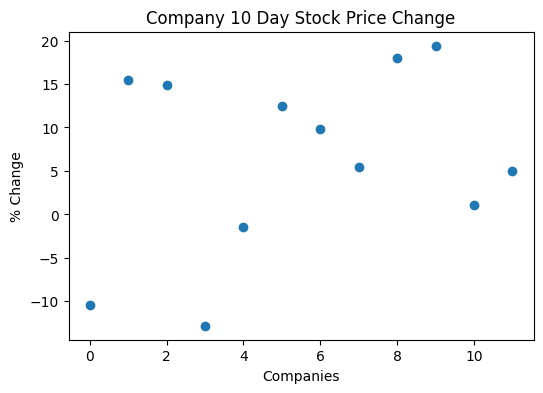

In [65]:
Y.plot(style="o", figsize=(6,4), title="Company 10 Day Stock Price Change")
plt.xlabel("Companies")
plt.ylabel("% Change")
plt.title("Company 10 Day Stock Price Change")
plt.savefig("stock_price_change.png", dpi=300, bbox_inches='tight')
plt.show()

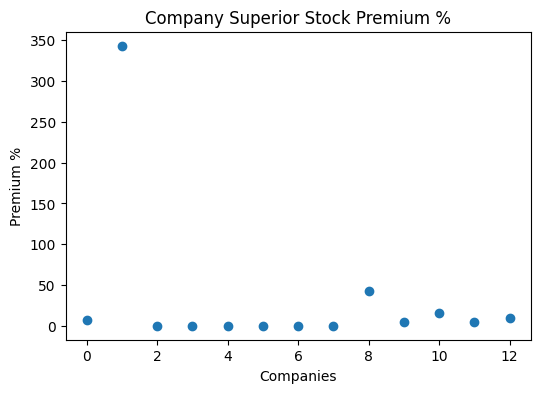

In [ ]:
"""
Y.plot(style="o", figsize=(6,4), title="Company Superior Stock Premium %")
plt.xlabel("Companies")
plt.ylabel("Premium %")
plt.title("Company Superior Stock Premium %")
plt.savefig("premium_plot.png", dpi=300, bbox_inches='tight')
plt.show()
"""


In [66]:
#from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import RobustScaler

In [67]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [68]:
# Add a constant term for the intercept
X_with_const = sm.add_constant(X_scaled)

ols_model = sm.OLS(Y, X_with_const).fit()

print(ols_model.summary())


                              OLS Regression Results                             
Dep. Variable:     Stock Change 10-day %   R-squared:                       0.111
Model:                               OLS   Adj. R-squared:                 -0.222
Method:                    Least Squares   F-statistic:                    0.3341
Date:                   Mon, 06 Oct 2025   Prob (F-statistic):              0.801
Time:                           23:57:41   Log-Likelihood:                -44.195
No. Observations:                     12   AIC:                             96.39
Df Residuals:                          8   BIC:                             98.33
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const 

In [69]:
MAGNA_X = MAGNA.loc[MAGNA["Company"]=="Magna", X.columns]
MAGNA_SCALED = pd.DataFrame(scaler.transform(MAGNA_X),columns=X.columns)
X_new_with_const = sm.add_constant(MAGNA_SCALED, has_constant='add')
y_new_pred = ols_model.predict(X_new_with_const)
y_new_pred

0    25.447244
dtype: float64